In [120]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import osmnx as ox
import shapely
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import seaborn as sns

**Where to drink beer in Budapest?**

Better bars in Buda?  Which district is worth going out in?

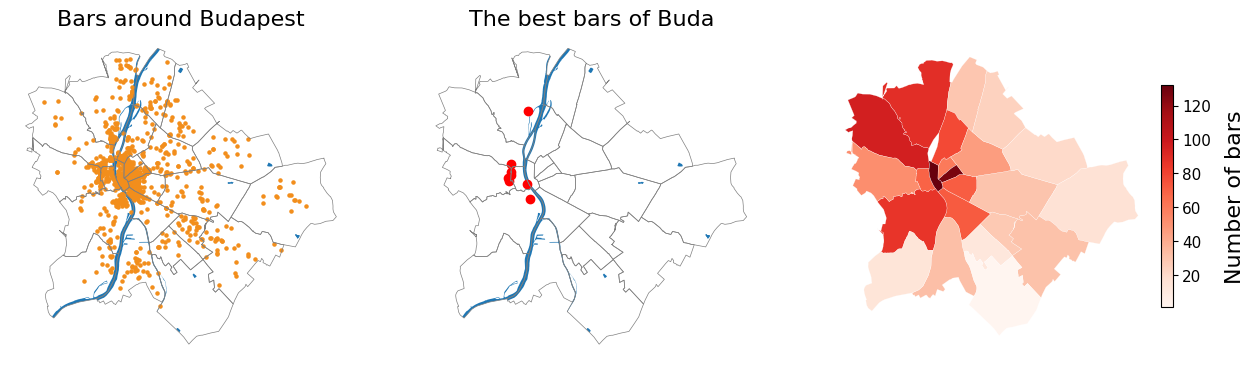

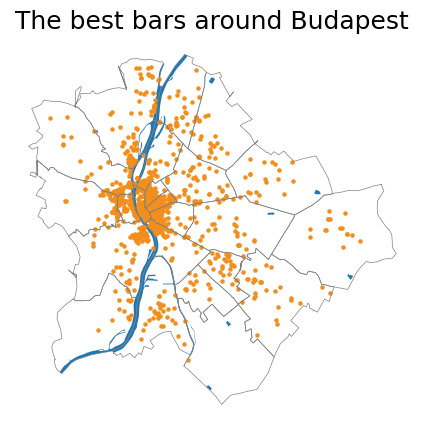

In [190]:
# Budapest shape
bp_shape = gpd.read_file("../data/shape_files/budapest_shape/budapest_shape.shp")

# river shape
bp_river_shape = gpd.read_file("../data/shape_files/budapest_waters_shape/budapest_waters_shape.shp")

# districts
bp_districts = gpd.read_file("../data/shape_files/budapest_districts_shape/budapest_districts_shape.shp")

# google data on bars
bp_bars = gpd.read_file("../data/budapest_bars.geojson")

fig, ax = plt.subplots(1,1, figsize=(6,5))
bp_river_shape.plot(ax=ax)
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax)
bp_bars.plot(color="#f28e1c", markersize=5, ax=ax)
ax.set_title("The best bars around Budapest", size=18)
ax.set_axis_off()

**Best bars around Buda?**

In [191]:
# identify buda through spatial join (sjoin)
buda_bars = bp_bars.sjoin(bp_districts[bp_districts["buda01"]==1])["place_id"].to_list()
bp_bars["buda_bar"] = np.where(bp_bars["place_id"].isin(buda_bars), 1, 0)

In [192]:
# define the bests
rating_threshold = 4.9
minimum_rating = 20
buda01 = 1
best_bars = bp_bars[
    (bp_bars["rating"] >= rating_threshold)
    & (bp_bars["nr_ratings"] >= minimum_rating)
    & (bp_bars["buda_bar"] == buda01)
]

bp_bars["best_on_side"] = (bp_bars["place_id"].isin(best_bars["place_id"])).astype(int)

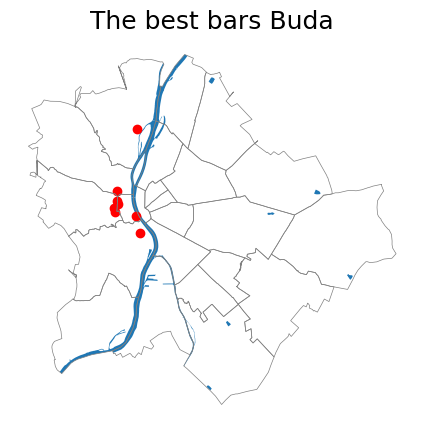

In [194]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
bp_river_shape.plot(ax=ax)
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax)
bp_bars[bp_bars["best_on_side"]==1].plot(color="red", ax=ax)
ax.set_title("The best bars Buda", size=18)
ax.set_axis_off()

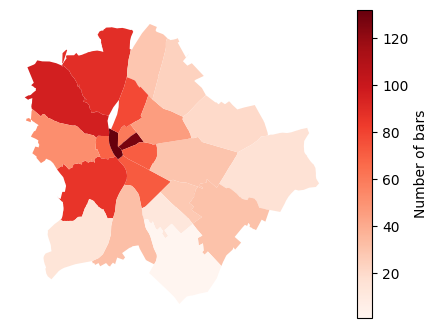

In [229]:
test = bp_districts.sjoin(bp_bars)
test = test.groupby(["name", "geometry"])["place_id"].agg("nunique").reset_index()
test = gpd.GeoDataFrame(test)
fig,ax = plt.subplots(1,1, figsize=(6,4))
test.plot(column="place_id", cmap="Reds", legend=True, legend_kwds={"label": "Number of bars", "orientation": "vertical"}, ax=ax)
ax.set_axis_off()

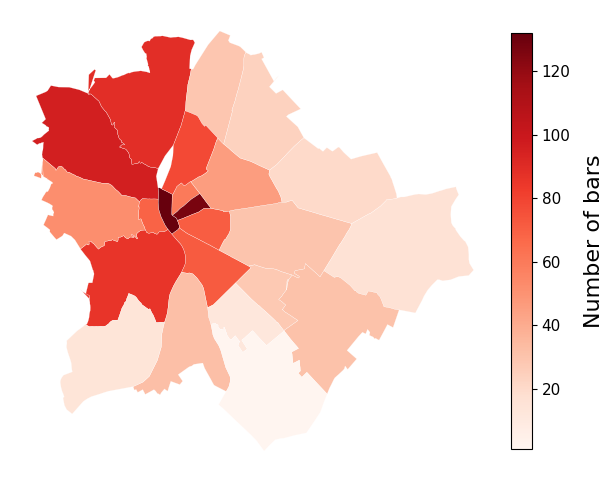

In [244]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
test.plot(column="place_id", cmap="Reds", ax=ax)
test.boundary.plot(color="white", linewidth=0.125, ax=ax)
ax.axis('off')

# create colorbar as a legend
vmin = test["place_id"].min()
vmax = test["place_id"].max()

sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation="vertical", fraction=0.08, pad=0.025, shrink=0.9, ax=ax)
cbar.ax.set_ylabel("Number of bars", size=fontsize)
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.tick_params(labelsize = fontsize-5)
#cbar.set_ticks([1, 2, 3])
#cbar.set_ticklabels([r'$10^1$', r'$10^2$', r'$10^3$'])
ax.set_axis_off()


In [ ]:
color_dict = {0: "grey", 1: "red"}
bp_bars["color"] = bp_bars["best_on_side"].map(color_dict)

In [149]:
bp_bars[(bp_bars["rating"]==5) & (bp_bars["nr_ratings"] >= 10)]

,place_id,rating,nr_ratings,geometry
6,ChIJWTCAyOTCQUcRfBNv_20fPp8,5.0,20.0,POINT (19.15290 47.45440)
68,ChIJmRuRQondQUcROmcRO4EN6zg,5.0,18.0,POINT (19.05241 47.51427)
176,ChIJgT8YSurZQUcRS-_wqzjuI3M,5.0,61.0,POINT (19.04659 47.55710)
213,ChIJo97wOWzZQUcRLPbQn6gM02o,5.0,13.0,POINT (19.03824 47.52998)
247,ChIJq6-NVjfbQUcRKz1P5StkqC0,5.0,19.0,POINT (19.13170 47.54402)
288,ChIJ4TkIbF3fQUcRUDEpodXvLqI,5.0,11.0,POINT (19.00867 47.51039)
474,ChIJXxedNOHdQUcRvA4Ut0sxWbk,5.0,13.0,POINT (19.07454 47.49735)
557,ChIJXSSw9DndQUcRhe87PgLthDI,5.0,42.0,POINT (19.06400 47.48588)
708,ChIJ_4U1Il90akcRQTLPGMBsezo,5.0,12.0,POINT (19.02599 47.50348)
742,ChIJp2U13kDcQUcRzGQgIHCY2fA,5.0,138.0,POINT (19.05387 47.49362)


In [143]:
bp_bars[bp_bars["nr_ratings"]>20].fillna(0).sort_values(by="rating", ascending=False)

,place_id,rating,nr_ratings,geometry,buda_bar
832,ChIJy960hQzdQUcRdB6Tp2Olidw,5.0,42.0,POINT (19.06684 47.48484),0
176,ChIJgT8YSurZQUcRS-_wqzjuI3M,5.0,61.0,POINT (19.04659 47.55710),1
842,ChIJO68muw7bQUcR0im5GOYPcyk,5.0,22.0,POINT (19.13475 47.54640),0
742,ChIJp2U13kDcQUcRzGQgIHCY2fA,5.0,138.0,POINT (19.05387 47.49362),0
557,ChIJXSSw9DndQUcRhe87PgLthDI,5.0,42.0,POINT (19.06400 47.48588),0
...,...,...,...,...,...
407,ChIJ9zYPTUPaQUcRi7PtEzjN9tA,2.9,72.0,POINT (19.11201 47.56581),0
591,ChIJa7ipiEDcQUcRDn0V_E2YZkA,2.6,391.0,POINT (19.05028 47.49628),0
586,ChIJTzBhM6feQUcRb085QgPStQ8,2.5,23.0,POINT (19.02563 47.50929),1
1024,ChIJo9UR-ujfQUcRcfGV9fG_Vhg,1.6,22.0,POINT (19.02672 47.50920),1


In [126]:
# find districts in Buda
buda_bars = bp_bars.sjoin(bp_districts[bp_districts["buda01"]==1])["place_id"].to_list()
bp_bars["buda_bar"] = np.where(bp_bars["place_id"].isin(buda_bars), 1, 0)


<Axes: >

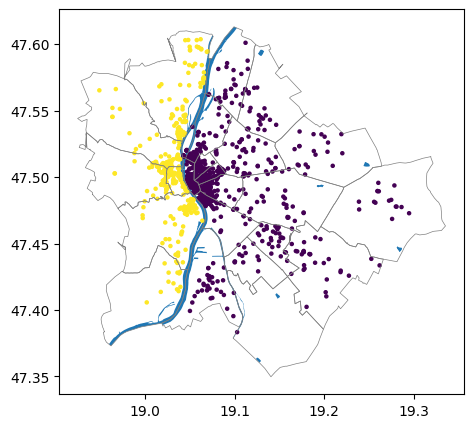

In [106]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
bp_river_shape.plot(ax=ax)
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax)
#bp_bars.plot(color="red", markersize=5, ax=ax)
bp_bars.plot(column="buda_bar", markersize=5, ax=ax)
#bp_bars.plot(column="buda_bar")
#ax.set_axis_off()

In [124]:
# find districts in Buda
buda_bars = bp_bars.sjoin(bp_districts[bp_districts["buda01"]==1])["place_id"].to_list()
bp_bars["buda_bar"] = np.where(bp_bars["place_id"].isin(buda_bars), 1, 0)
#bp_districts[bp_districts["buda01"]==1].sjoin(bp_bars)

In [125]:
bp_bars

,place_id,rating,nr_ratings,geometry,buda_bar
0,ChIJx0eU_uDEQUcRwDaUKjnCANA,NaN,NaN,POINT (19.19672 47.53220),0
1,ChIJZYwmScnFQUcREn8JAw0PyIE,NaN,NaN,POINT (19.20409 47.52600),0
2,ChIJoxIOMvvCQUcR_mKC1vrTi00,NaN,NaN,POINT (19.15400 47.45407),0
3,ChIJr-72e3fDQUcR63jCzlNzrDg,5.0,1.0,POINT (19.14578 47.45784),0
4,ChIJxYGMie_CQUcRIbE-tYqbQgY,NaN,NaN,POINT (19.14959 47.45152),0
...,...,...,...,...,...
1244,ChIJI5tZy7LdQUcRx033ityOz_Q,4.8,218.0,POINT (19.04982 47.47903),1
1245,ChIJW7UkEcfZQUcRmRJnTCiodio,4.8,8.0,POINT (18.98290 47.53302),1
1246,ChIJew3oD1vcQUcR88sk5uM2xYc,4.1,96.0,POINT (19.06337 47.49010),0
1247,ChIJm_lcBm_cQUcRgZr2kTIWwhQ,4.3,214.0,POINT (19.06692 47.50374),0


<Axes: >

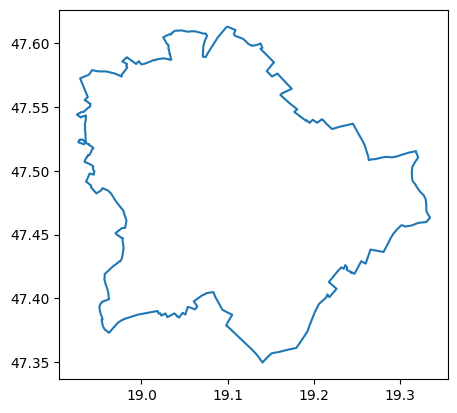

In [5]:
bp_shape.boundary.plot()

<Axes: >

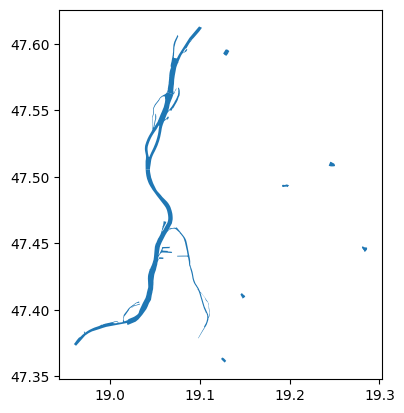

In [6]:
bp_river_shape.plot()

<Axes: >

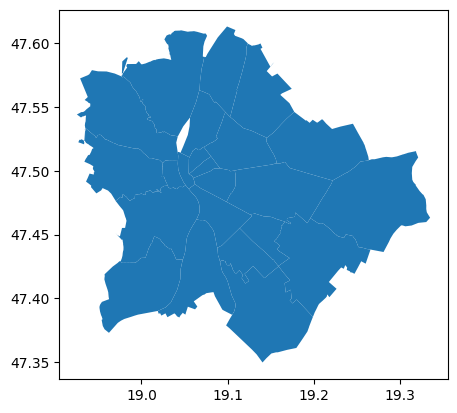

In [7]:
bp_districts.plot()

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
fontsize=16

bp_river_shape.plot(ax=ax[0])
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax[0])
bp_bars.plot(color="#f28e1c", markersize=5, ax=ax[0])
ax[0].set_title("Bars around Budapest", size=fontsize)
ax[0].set_axis_off()

bp_river_shape.plot(ax=ax[1])
bp_districts.boundary.plot(linewidth=0.5, color="grey", ax=ax[1])
bp_bars[bp_bars["best_on_side"]==1].plot(color="red", ax=ax[1])
ax[1].set_title("The best bars of Buda", size=fontsize)
ax[1].set_axis_off()

test.plot(column="place_id", cmap="Reds", ax=ax[2])
test.boundary.plot(color="white", linewidth=0.125, ax=ax[2])
ax[2].axis('off')

# create colorbar as a legend
vmin = test["place_id"].min()
vmax = test["place_id"].max()

sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, orientation="vertical", fraction=0.0325, pad=0.025, shrink=0.9, ax=ax[2])
cbar.ax.set_ylabel("Number of bars", size=fontsize)
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.tick_params(labelsize = fontsize-5)
#cbar.set_ticks([1, 2, 3])
#cbar.set_ticklabels([r'$10^1$', r'$10^2$', r'$10^3$'])
ax[2].set_axis_off()
